In [42]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier


In [43]:
import pandas as pd

df = pd.read_csv("weeks_received.csv")
print(df.head())
print(df.info())


   week_start    week_end  distance_km  sessions  duration_min  \
0  2024-01-22  2024-01-29    23.397820         3    142.396351   
1  2024-01-29  2024-02-05    17.548586         5    110.718513   
2  2024-02-05  2024-02-12    29.044244         6    178.185437   
3  2024-02-12  2024-02-19    30.469471         4    180.692490   
4  2024-02-19  2024-02-26     0.000000         0      0.000000   

   low_intensity_pct  high_intensity_pct  variation_km  longest_run_km  \
0           0.322431            0.677569      0.000000       14.330868   
1           0.665762            0.334238     -5.849234       10.032441   
2           0.423815            0.576185     11.495659       13.732183   
3           0.882353            0.117647      1.425227       10.299794   
4           0.000000            0.000000    -30.469471        0.000000   

   weekly_load  sig_weekly_avg_km  sig_weekly_std_km  sig_trend_12w_pct  \
0   238.879672          27.540042           8.531502           2.629574   
1   147.

In [44]:
# Conversion dates
df["week_start"] = pd.to_datetime(df["week_start"])
df["week_end"] = pd.to_datetime(df["week_end"])

# Supprimer les semaines incomplètes si besoin
df = df.dropna(subset=["distance_km", "sessions", "duration_min"])

# Optionnel : filtrer une période récente
df = df[df["week_start"] >= "2024-08-12"]

df = df.reset_index(drop=True)
print("✅ Dataset prêt :", df.shape)


✅ Dataset prêt : (75, 18)


In [45]:
#cutoff_date = pd.to_datetime("2025-02-03")
#df = df[df["week_start"] >= cutoff_date]
print(df["week_start"].min())
print(len(df))

2024-08-12 00:00:00
75


In [46]:
FEATURES = [
    "distance_km",
    "sessions",
    "duration_min",
    "low_intensity_pct",
    "high_intensity_pct",
    "variation_km",
    "longest_run_km",
    "weekly_load",
]

X = df[FEATURES].copy()


In [47]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [48]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=20)

df["cluster"] = kmeans.fit_predict(X_scaled)

In [49]:
print(df.groupby("cluster")[FEATURES].mean().round(2))


         distance_km  sessions  duration_min  low_intensity_pct  \
cluster                                                           
0              31.23      4.26        195.23               0.70   
1               7.66      1.50         47.85               0.27   
2              31.92      3.35        196.82               0.55   

         high_intensity_pct  variation_km  longest_run_km  weekly_load  
cluster                                                                 
0                      0.09          1.05           10.94       211.16  
1                      0.16        -13.57            4.40        57.94  
2                      0.45          6.20           14.02       283.31  


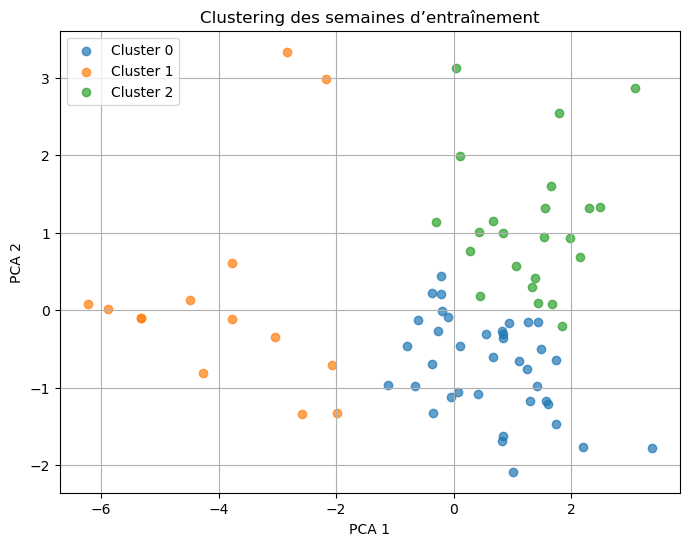

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# X_scaled : tes features normalisées
# df["cluster"] : résultat du KMeans

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

df["pca1"] = X_pca[:, 0]
df["pca2"] = X_pca[:, 1]

plt.figure(figsize=(8, 6))

for c in sorted(df["cluster"].unique()):
    subset = df[df["cluster"] == c]
    plt.scatter(subset["pca1"], subset["pca2"], label=f"Cluster {c}", alpha=0.7)

plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("Clustering des semaines d’entraînement")
plt.legend()
plt.grid(True)
plt.show()


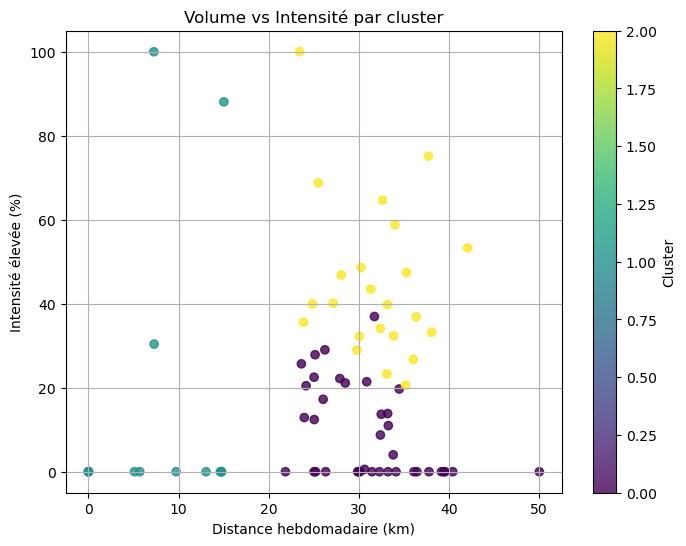

In [51]:
plt.figure(figsize=(8, 6))

plt.scatter(
    df["distance_km"], df["high_intensity_pct"] * 100, c=df["cluster"], alpha=0.8
)

plt.xlabel("Distance hebdomadaire (km)")
plt.ylabel("Intensité élevée (%)")
plt.title("Volume vs Intensité par cluster")
plt.colorbar(label="Cluster")
plt.grid(True)
plt.show()
